In [40]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import time
from git import Repo
import os
import sys
import statistics
import matplotlib.pyplot as plt
import numpy as np
import time
import operator
import random
from scipy.stats import uniform
import seaborn as sns
from datetime import datetime
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import train_test_split
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics
from sklearn.metrics import roc_auc_score

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier
import numpy as np
from pprint import pprint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    average_precision_score,
    classification_report
)

In [41]:
mypath = 'dataset_rz'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.remove('achilles.csv')
onlyfiles.remove('sonar.csv')
onlyfiles.remove('graylog2.csv')
onlyfiles = ['ibm.csv']

In [42]:
# Append-adds at last
def append_file(output):
    file1 = open("hp_apfd_outout_sota_default_FI_sep.txt","a")#append mode
    file1.write(output +  "\n")
    file1.close()

In [43]:
def calcualte_base_value ():
    for file in onlyfiles:
        append_file('base ' + file)
        dataset = pd.read_csv('dataset_rz/' + file)
        dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
    
        #print(file)
        #append_file(file)
        print(list(dataset))
        #print(dataset.shape)
        #append_file(str(dataset.shape[0]))
        part = dataset.tail(int(dataset.shape[0] * 0.6))
        append_file('data size ' + str(dataset.shape[0]))
    
    
        column_names = ["parent_job", "failure_array", "first_failure", "last_failure", "averag_failure_position", "APFD"]
        df_prob = pd.DataFrame(columns = column_names)
    
        #dataset = pd.read_csv('prd_prob_' + date + clf.__class__.__name__+ 'tune_afp.csv')
        dataset = part
        #print(dataset)
        #print(dataset.stage_id.unique())
        parent_job_array = dataset.stage_id.unique()
    
        for parent_job in parent_job_array:
            df = dataset[dataset['stage_id'] == parent_job]
            n = len(df. index)
            i = 1
            failure_array = []
        
        
            for a,b, c in zip(df.Test_Identifier, df['Failed'], df['stage_id']):
                #print(a,b,c)
                if (b == 1):
                    #print(a,b,c)
                    #print ('position', i)
                    failure_array.append(i)
                i+= 1
                # m is the number of test suite failures.
                m=len(failure_array)
                if(m!=0):
                    APFD=1-(sum(failure_array)/(m*n))+(1/(2*n))
                    pj = c
        
            if(len(failure_array) > 0):
                new_row = {'parent_job_name': c, 'parent_job': parent_job, 'failure_array': failure_array , 'first_failure': failure_array[0], "last_failure": failure_array[-1]  , "averag_failure_position": statistics.mean(failure_array), "APFD": APFD}
                #append row to the dataframe
                df_prob = df_prob.append(new_row, ignore_index=True)
                
    append_file('AFP Base (mean) of '+  + file + str(df_prob['averag_failure_position'].mean()))



In [44]:
#dataset = pd.read_csv('../data/ml_ready_data_2022_july.csv')
def calcualte_afp_value (clf_new):
    feature_importance_arrays = []
    for file in onlyfiles:
        append_file(file)
        dataset = pd.read_csv('dataset_rz/' + file)
        dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
    
        #print(file)
        #append_file(file)
        #print(list(dataset))
        print(file, dataset.shape)
        #append_file(str(dataset.shape[0]))
        part = dataset.tail(int(dataset.shape[0] * 1))
        append_file('data size ' + str(dataset.shape[0]))

        
        columns = [
            'Test_Identifier',
            'Execution_Count',
            'Test_Total',
            'Failure_Count', 
            'Failure_Rate', 
            'Last_Failure_Age', 
            'Last_Failure', 
            'Last_Transition', 
            'Transition_Count',
            '#Files_Changed',
            '#Lines_Inserted',
            '#Lines_Deleted'
        ]
        
        #columns = [
        #    'Test_Identifier',
        #    'Execution_Count',
        #    'Test_Total',
            
            
        #    'Last_Transition', 
        #    'Transition_Count',
        #    '#Lines_Inserted',
        #]
    
        X = part.drop('Failed', axis=1)
        y = part['Failed']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
        #print(X_train, X_test, y_train, y_test)
        X_test_all = X_test
        X_train = X_train[columns]
        #y_train=y_train['Failed']
        X_test = X_test[columns]
        #y_test = y_test['Failed']
        
        print('train size', X_train.shape[0]/X.shape[0])
        print(y_train.value_counts())
        print('test size', X_test.shape[0]/X.shape[0])
        print(y_test.value_counts())
        
    
        print(clf_new)
        append_file(str(clf_new))
        clf = clf_new
        #print(clf.__class__.__name__)
        append_file(clf.__class__.__name__)
        start = time.time()
        clf.fit(X_train,y_train)
        stop = time.time()
        append_file("Training time:" + str((stop - start)) + "s")
        pred = clf.predict_proba(X_test)
    
        y_pred = clf.predict(X_test)
    
        score = clf.score(X_test, y_test)
        
        print(clf.__class__.__name__)
        
        if clf.__class__.__name__ == 'RandomForestClassifier':
            feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
            start_time = time.time()
            importances = clf.feature_importances_
            std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
            elapsed_time = time.time() - start_time
            print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
        
            feature_names = X_train.columns  # Use the actual feature names
            
            # Store feature importances in the array
            feature_importance_arrays.append((feature_names, importances))
    
            forest_importances = pd.Series(importances, index=feature_names)
            print(forest_importances)
    
            fig, ax = plt.subplots()
            forest_importances.plot.bar(yerr=std, ax=ax)
            ax.set_title("Feature importances using MDI using " + file)
            ax.set_ylabel("Mean decrease in impurity")
            fig.tight_layout()
            plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
            plt.show()  # Display the plot
            
        if clf.__class__.__name__ == 'DecisionTreeClassifier':
            # let's create a dictionary of features and their importance values
            feat_dict= {}
            for col, val in sorted(zip(X_train.columns, clf.feature_importances_),key=lambda x:x[1],reverse=True):
                feat_dict[col]=val
            feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})
            print(feat_df)
            
        if clf.__class__.__name__ == 'XGBClassifier':
            print(clf.feature_importances_)
            sorted_idx = xgb.feature_importances_.argsort()
            plt.barh(X_train.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
            plt.xlabel("Xgboost Feature Importance")
        if clf.__class__.__name__ == 'GradientBoostingClassifier':
            imp_features = clf.feature_importances_
            for i in imp_features:
                print(i.round(3))
                features = X_train.columns  # Use the actual feature names
                df_imp_features = pd.DataFrame({"features":features}).join(pd.DataFrame({"weights":imp_features}))
                df_imp_features.sort_values(by=['weights'], ascending=False)
                print(df_imp_features)
        
    

    
        print('Accuracy', accuracy_score(y_test, y_pred))
        append_file('Accuracy')
        append_file(str(accuracy_score(y_test, y_pred)))
        print('balanced_accuracy_score', balanced_accuracy_score(y_test, y_pred))
        print('AUC', roc_auc_score(y_test, y_pred))
        append_file('AUC')
        append_file(str(roc_auc_score(y_test, y_pred)))
    
        append_file(classification_report(y_test,y_pred, target_names=['Passed tests', 'Failed tests'], digits=4))
        print(classification_report(y_test,y_pred, target_names=['Passed tests', 'Failed tests'], digits=4))
        
        if file == 'ibm.csv':
            parent_job = 'PARENT_JOB'
        else:
            parent_job = 'stage_id'
    
        submission = pd.DataFrame({
            "PARENT_JOB":list(X_test_all[parent_job]),
            "BUCKET_Number":list(X_test["Test_Identifier"]),
            "y_actual":list(y_test),
            "y_pred":list(y_pred),
            "probabilities":list(pred)
        })
    
    
        column_names = ["parent_job", "failure_array", "failure_prob", "first_failure", "last_failure", "averag_failure_position", "APFD"]
        df_prob = pd.DataFrame(columns = column_names)
    
        #dataset = pd.read_csv('prd_prob_' + date + clf.__class__.__name__+ 'tune_afp.csv')
        dataset = submission
        #print(dataset)
        #print(dataset.PARENT_JOB.unique())
        parent_job_array = dataset.PARENT_JOB.unique()
    
        for parent_job in parent_job_array:
            #print(str(parent_job))
            df = dataset[dataset['PARENT_JOB'] == parent_job]
        
            df['probabilities'] = df['probabilities'].str[-1:].astype(float)
            #print(df['probabilities'])
            df = df.sort_values(by=['probabilities'],ignore_index=True, ascending=False)
            n = len(df. index)
        
            i = 1
            failure_array = []
            prob_position_array = []
        
            for a,b, c, d in zip(df.BUCKET_Number, df['y_actual'], df['y_pred'], df['probabilities']):
                #print(a,b,c)
                if (b == 1):
                    #print(a,b,c)
                    #print ('position', i)
                    failure_array.append(i)
                    prob_position_array.append(d)
                i+= 1
                # m is the number of test suite failures.
                m=len(failure_array)
                if(m!=0):
                    APFD=1-(sum(failure_array)/(m*n))+(1/(2*n))
        
            if(len(failure_array) > 0):
            
                new_row = pd.DataFrame({'parent_job': parent_job,
                                        'failure_array': failure_array,
                                        'failure_prob': prob_position_array,
                                        'first_failure': failure_array[0],
                                        "last_failure": failure_array[-1]  ,
                                        "averag_failure_position": statistics.mean(failure_array),
                                        "APFD": APFD})
                df_prob = pd.concat([df_prob, new_row])
        
            #import statistic as st
        print('APFD (mean)', df_prob['APFD'].mean())
        append_file('APFD (mean) '+ str(df_prob['APFD'].mean()))
        append_file('first failure (mean) '+ str(df_prob['first_failure'].mean()))
        append_file('last failure (mean) '+ str(df_prob['last_failure'].mean()))
        append_file('AFP (mean) '+ str(df_prob['averag_failure_position'].mean()))
        print('first failure (mean)', df_prob['first_failure'].mean())
        print('last failure (mean)', df_prob['last_failure'].mean())
        print('AFP (mean)', df_prob['averag_failure_position'].mean())
        print('***************')
        print(feature_importance_arrays)
        #return df_prob

In [45]:
def hptune_task():
    c = ''
    avg_scores = {}
    newDF = pd.DataFrame() #creates a new dataframe that's empty

    random_forest= {
#         'model': RandomForestClassifier(),
        'params' : {
            #'n_estimators': [1,10,20],
            'n_estimators': [100],
            #'criterion': ["gini", 'entropy'],
            'criterion': ["gini"],
            'max_features': ['sqrt'],
            #'max_features': [None, 'sqrt', 'log2']
        }
    }
    
    decision_tree = {
#         'model': DecisionTreeClassifier(),
        'params': {
            #'max_depth': [2,6, 8,10],
            'max_depth': [5],
            #'criterion': ['gini', 'entropy'],
            'criterion': ['gini'],
            #'splitter': ['best', 'random'],
            'splitter': ['best'],
            #'max_features': ['auto', 'sqrt', 'log2']
            'max_features': ['auto']
        }
    }

    XGBClassifier = {
#         'model': XGBClassifier(),
        'params': {
#             'min_child_weight': [1, 5, 10],
#             'gamma': [0.5, 1, 1.5, 2, 5],
             #'subsample': [0.6, 0.8, 1],
             'subsample': [1],
             #'eta': [0.1, 0.5, 0.3],
             'eta': [0.3],
#             'colsample_bytree': [0.6, 0.8, 1.0],
             #'max_depth': [2, 4, 10]
             'max_depth': [6]
        }
    }

    gboostingClassifier = {
#         'model': GradientBoostingClassifier(),
        'params': {
             #"learning_rate": [0.1, 0.5, 1],
             "learning_rate": [0.1],
#             "subsample"    : sp_randFloat(),
             #"n_estimators" : [10, 20, 30],
             "n_estimators" : [100],
             #"max_depth"    : [4, 10]
             "max_depth"    : [3]
        }
    }

    print("Which Machine Learning Classifier you want to optimized?")
    print("Press 1 - Decision tree, \nPress 2 - Random Forest,\nPress 3 - XGBoost,\nPress 4 - Gradient Boosting,\nPress 0 - All Models\n")
    x = input("")
    # print("Hello, " + x)

    if x == "1":
        print("Decision tree classifier selected")
        for q in decision_tree['params']['max_depth']:
            for r in decision_tree['params']['criterion']:
                for s in decision_tree['params']['splitter']:
                    for t in decision_tree['params']['max_features']:
                        df_probab = calcualte_afp_value(DecisionTreeClassifier(max_depth=q, criterion=r, splitter=s, max_features=t))
                        #cv_scores = df_probab['averag_failure_position'].mean()
                        #avg_scores['decision_tree_' + r + '_' + str(q)] = cv_scores
                        #newDF['decision_tree_' + r + '_' + str(q)] =  df_probab['averag_failure_position']
                
    elif x == "2":
        print("Random Forest classifier selected")
        for q in random_forest['params']['n_estimators']:
            for r in random_forest['params']['criterion']:
                for s in random_forest['params']['max_features']:
                    df_probab = calcualte_afp_value(RandomForestClassifier(n_estimators=q, criterion=r, max_features=s))
                    #df_probab = calcualte_afp_value(RandomForestClassifier())
                    #cv_scores = df_probab['averag_failure_position'].mean()
                    #avg_scores['random_forest' + '_n_estimators_' + str(q)] = cv_scores
                    #newDF['random_forest' + '_n_estimators_' + str(q)] =  df_probab['averag_failure_position']
        
    elif x == "3":
        print("Xgboost classifier selected")
        for q in XGBClassifier['params']['max_depth']:
            for r in XGBClassifier['params']['eta']:
                for s in XGBClassifier['params']['subsample']:
                    df_probab = calcualte_afp_value(xgboost.XGBClassifier(max_depth=q, eta=r, subsample=s))
                    #cv_scores = df_probab['averag_failure_position'].mean()
                    #avg_scores['XGBClassifier' + '_max_depth_' + str(q)] = cv_scores
                    #newDF['XGBClassifier' + '_max_depth_' + str(q)] =  df_probab['averag_failure_position']    
    elif x == "4":
        print("Gradient boosting classifier selected")
        for q in gboostingClassifier['params']['max_depth']:
            for r in gboostingClassifier['params']['learning_rate']:
                for s in gboostingClassifier['params']['n_estimators']:
                    df_probab = calcualte_afp_value(GradientBoostingClassifier(max_depth=q, learning_rate=r, n_estimators=s))
                    #cv_scores = df_probab['averag_failure_position'].mean()
                    #avg_scores['GradientBoostingClassifier' + '_max_depth_' + str(q)] = cv_scores
                    #newDF['GradientBoostingClassifier' + '_max_depth_' + str(q)] =  df_probab['averag_failure_position']
    elif x == "0":
        print("Decision tree classifier selected")
        for q in decision_tree['params']['max_depth']:
            for r in decision_tree['params']['criterion']:
                for s in decision_tree['params']['splitter']:
                    for t in decision_tree['params']['max_features']:
                        df_probab = calcualte_afp_value(DecisionTreeClassifier(max_depth=q, criterion=r, splitter=s, max_features=t))
                        #cv_scores = df_probab['averag_failure_position'].mean()
                        #avg_scores['decision_tree_' + r + '_' + str(q)] = cv_scores
                        #newDF['decision_tree_' + r + '_' + str(q)] =  df_probab['averag_failure_position']
            
        print("Random Forest classifier selected")
        for q in random_forest['params']['n_estimators']:
            for r in random_forest['params']['criterion']:
                for s in random_forest['params']['max_features']:
                    df_probab = calcualte_afp_value(RandomForestClassifier(n_estimators=q, criterion=r, max_features=s))
                    #df_probab = calcualte_afp_value(RandomForestClassifier())
                    #cv_scores = df_probab['averag_failure_position'].mean()
                    #avg_scores['random_forest' + '_n_estimators_' + str(q)] = cv_scores
                    #newDF['random_forest' + '_n_estimators_' + str(q)] =  df_probab['averag_failure_position']
    
        print("Xgboost classifier selected")
        for q in XGBClassifier['params']['max_depth']:
            for r in XGBClassifier['params']['eta']:
                for s in XGBClassifier['params']['subsample']:
                    df_probab = calcualte_afp_value(xgboost.XGBClassifier(max_depth=q, eta=r, subsample=s))
                    #cv_scores = df_probab['averag_failure_position'].mean()
                    #avg_scores['XGBClassifier' + '_max_depth_' + str(q)] = cv_scores
                    #newDF['XGBClassifier' + '_max_depth_' + str(q)] =  df_probab['averag_failure_position']    
        print("Gradient boosting classifier selected")
        for q in gboostingClassifier['params']['max_depth']:
            for r in gboostingClassifier['params']['learning_rate']:
                for s in gboostingClassifier['params']['n_estimators']:
                    df_probab = calcualte_afp_value(GradientBoostingClassifier(max_depth=q, learning_rate=r, n_estimators=s))
                    #cv_scores = df_probab['averag_failure_position'].mean()
                    #avg_scores['GradientBoostingClassifier' + '_max_depth_' + str(q)] = cv_scores
                    #newDF['GradientBoostingClassifier' + '_max_depth_' + str(q)] =  df_probab['averag_failure_position']
        
    else: 
        "Invalid input"
    
    #print(avg_scores)
    #best_ml = min(avg_scores.items(), key=operator.itemgetter(1))[0]
    #print(min(avg_scores.items(), key=operator.itemgetter(1))[0])
    #base_df = calcualte_base_value()
    #print(base_df)
    #append_file('base_apfd ' + str(base_df))

Which Machine Learning Classifier you want to optimized?
Press 1 - Decision tree, 
Press 2 - Random Forest,
Press 3 - XGBoost,
Press 4 - Gradient Boosting,
Press 0 - All Models

2
Random Forest classifier selected
ibm.csv (4571562, 26)
train size 0.5999999562512769
0    2732387
1      10550
Name: Failed, dtype: int64
test size 0.4000000437487231
0    1821592
1       7033
Name: Failed, dtype: int64
RandomForestClassifier(max_features='sqrt')
RandomForestClassifier
Elapsed time to compute the importances: 0.031 seconds
Test_Identifier     0.106354
Execution_Count     0.127713
Test_Total          0.124377
Failure_Count       0.063095
Failure_Rate        0.113720
Last_Failure_Age    0.092665
Last_Failure        0.077347
Last_Transition     0.077746
Transition_Count    0.066203
#Files_Changed      0.040077
#Lines_Inserted     0.060791
#Lines_Deleted      0.049911
dtype: float64


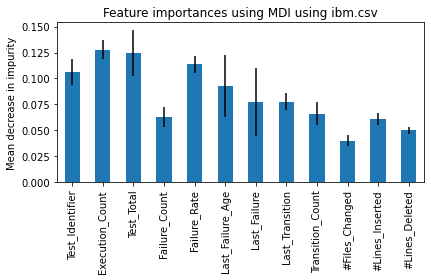

Accuracy 0.9981986465240276
balanced_accuracy_score 0.7949248661037038
AUC 0.7949248661037038
              precision    recall  f1-score   support

Passed tests     0.9984    0.9998    0.9991   1821592
Failed tests     0.9099    0.5901    0.7159      7033

    accuracy                         0.9982   1828625
   macro avg     0.9542    0.7949    0.8575   1828625
weighted avg     0.9981    0.9982    0.9980   1828625

APFD (mean) 0.9137902947173085
first failure (mean) 9.962036115455708
last failure (mean) 58.670553106782315
AFP (mean) 27.13322906298885
***************
[(Index(['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      dtype='object'), array([0.10635441, 0.12771255, 0.12437685, 0.06309517, 0.11372   ,
       0.09266548, 0.07734697, 0.07774597, 0.06620334, 0.04007707,
       0.06079074, 0.0

In [46]:
hptune_task()
#calcualte_base_value()

In [ ]:
dataset.shape

In [ ]:
#drop the first column
#cols = [0]
#dataset.drop(dataset.columns[cols],axis=1,inplace=True)
#dataset.head(5)

In [ ]:
dataset.dtypes

In [ ]:
dataset['JOB_START_TIMESTAMP'] = pd.to_datetime(dataset['JOB_START_TIMESTAMP'])

In [ ]:
dataset = dataset[dataset['JOB_START_TIMESTAMP'].dt.date.astype(str) < '2020-01-01']
dataset = dataset.sort_values(by=['JOB_START_TIMESTAMP'],ignore_index=True)

In [ ]:
dataset

In [ ]:
date = '2019-10-01'

train = dataset[dataset['JOB_START_TIMESTAMP'].dt.date.astype(str) < date]
test = dataset[dataset['JOB_START_TIMESTAMP'].dt.date.astype(str) >= date]

print('train size', train.shape[0]/dataset.shape[0])
print('test size', test.shape[0]/dataset.shape[0])
#test.to_csv('original_test_build.csv')
# print(train)
print('**********')
print(dataset.PARENT_JOB.nunique())

In [ ]:
columns = ['match_count', 'BUCKET_NAME','TEST_TOTAL','#Files changed','#Lines Deleted','#Lines Inserted','contains_unit','contains_fat','contains_java_filetype']
X_train = train[columns]
y_train=train['FAILED']
X_test = test[columns]
y_test = test['FAILED']

In [ ]:
scoring_met = 'f1'

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics

print(sorted(sklearn.metrics.SCORERS.keys()))

# Setup the parameters and distributions to sample from: param_dist
# param_dist = {"max_depth": [3, None],
#               "max_features": randint(1, 9),
#               "min_samples_leaf": randint(1, 9),
#               "criterion": ["gini", "entropy"]}
param_dist = {'max_depth': [2,4,5, 6, 7, 8,10,12, 25, 50, 100,500],
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5, scoring=scoring_met)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

append_file("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

# A parameter grid for XGBoost
params = {
        #'min_child_weight': [1, 5, 10],
        #'gamma': [0.5, 1, 1.5, 2, 5],
        #'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 50, 100, 500]
        }

classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring=scoring_met,n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

print(random_search.best_estimator_)
print(random_search.best_params_)

append_file("Tuned xgboost Parameters: {}".format(random_search.best_params_))

In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
parameters = {
    #"learning_rate": sp_randFloat(),
    #"subsample"    : sp_randFloat(),
    #"n_estimators" : sp_randInt(100, 1000),
    "max_depth"    : [4, 6, 8, 10, 25, 50, 100, 500]
}

randm = RandomizedSearchCV(estimator=model, param_distributions = parameters,cv = 2, n_iter = 10, n_jobs=-1, scoring=scoring_met)
randm.fit(X_train, y_train)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

append_file("The best estimator across ALL searched params:", randm.best_estimator_)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
#print(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
    'n_estimators': [1,5,10,15, 30, 50, 100, 500]
    #'max_features': max_features,
    #'max_depth': max_depth,
    #'min_samples_split': min_samples_split,
    #'min_samples_leaf': min_samples_leaf,
    #'bootstrap': bootstrap
}
print(random_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=0, random_state=42, n_jobs = -1, scoring= scoring_met)
# Fit the random search model
rf_random.fit(X_train, y_train)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", rf_random.best_estimator_)
print("The best score across ALL searched params:", rf_random.best_score_)
print("The best parameters across ALL searched params:", rf_random.best_params_)

append_file("The best estimator across ALL searched params:", rf_random.best_estimator_)

In [72]:
import pandas as pd

# Your data containing feature importances for each iteration
feature_importance_arrays = [
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.02500988, 0.20190792, 0.01041227, 0.1698891 , 0.19521764,
       0.25818243, 0.00038318, 0.04366382, 0.06764993, 0.00713676,
       0.01067264, 0.00987443]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.05712784, 0.10517232, 0.04327134, 0.10289942, 0.0997868 ,
       0.29095332, 0.00352092, 0.07603804, 0.09906978, 0.02477701,
       0.04693882, 0.0504444 ]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.03058563, 0.05978955, 0.01539822, 0.05563607, 0.1593346 ,
       0.44572055, 0.00153501, 0.1010972 , 0.07508298, 0.02460651,
       0.01574372, 0.01546996]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.02916288, 0.15101606, 0.0127574 , 0.14690894, 0.07244524,
       0.35410208, 0.01024934, 0.09161541, 0.052897  , 0.05268679,
       0.01299857, 0.0131603 ]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.10332848, 0.1276529 , 0.1271086 , 0.06443742, 0.11070639,
       0.09463355, 0.07586803, 0.07879157, 0.06507503, 0.04113233,
       0.06103815, 0.05022756]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.04450297, 0.08673542, 0.0377941 , 0.07902402, 0.09795123,
       0.33188024, 0.00219607, 0.08516723, 0.05171485, 0.10828819,
       0.03768683, 0.03705886]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.06267746, 0.1182618 , 0.03112703, 0.06238602, 0.09122182,
       0.35002522, 0.00119146, 0.07765202, 0.06904928, 0.07321066,
       0.03163351, 0.03156372]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.05315781, 0.17810726, 0.09522521, 0.12253971, 0.1030226 ,
       0.05982357, 0.00559623, 0.05875813, 0.1020212 , 0.02448176,
       0.09528918, 0.10197735]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.06029066, 0.10501026, 0.09023907, 0.09954604, 0.1600401 ,
       0.09525006, 0.01066767, 0.05814674, 0.0957752 , 0.0436333 ,
       0.09089564, 0.09050526]),
    (['Test_Identifier', 'Execution_Count', 'Test_Total', 'Failure_Count',
       'Failure_Rate', 'Last_Failure_Age', 'Last_Failure', 'Last_Transition',
       'Transition_Count', '#Files_Changed', '#Lines_Inserted',
       '#Lines_Deleted'],
      [0.04590612, 0.09906415, 0.0649924 , 0.12001517, 0.23376228,
       0.10501343, 0.02098082, 0.05130679, 0.09054504, 0.02937299,
       0.07200195, 0.06703885])
    # Add the data for the other 9 iterations here
]

# Create a dictionary to store the data
data_dict = {}

# Iterate through the feature importance arrays and populate the data dictionary
for feature_names, importances in feature_importance_arrays:
    for feature_name, importance in zip(feature_names, importances):
        if feature_name not in data_dict:
            data_dict[feature_name] = []
        data_dict[feature_name].append(importance)

# Create a DataFrame from the dictionary
df = pd.DataFrame(data_dict)

# Calculate mean, max, and min for each feature
summary_stats = df.agg(['mean', 'max', 'min']).T.rename(columns={'mean': 'Mean', 'max': 'Max', 'min': 'Min'})

# Save the DataFrame to a CSV file with summary statistics
df_with_summary = df.append(summary_stats)
summary_stats.to_csv('feature_importances_summary.csv', index=False)
df_with_summary.to_csv('feature_importances_with_summary.csv', index=False)


C:\Users\100737197\AppData\Local\Temp\ipykernel_23752\2316969482.py:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_with_summary = df.append(summary_stats)


In [69]:
df_with_summary

,Test_Identifier,Execution_Count,Test_Total,Failure_Count,Failure_Rate,Last_Failure_Age,Last_Failure,Last_Transition,Transition_Count,#Files_Changed,#Lines_Inserted,#Lines_Deleted,Mean,Max,Min
0,0.025010,0.201908,0.010412,0.169889,0.195218,0.258182,0.000383,0.043664,0.067650,0.007137,0.010673,0.009874,NaN,NaN,NaN
1,0.057128,0.105172,0.043271,0.102899,0.099787,0.290953,0.003521,0.076038,0.099070,0.024777,0.046939,0.050444,NaN,NaN,NaN
2,0.030586,0.059790,0.015398,0.055636,0.159335,0.445721,0.001535,0.101097,0.075083,0.024607,0.015744,0.015470,NaN,NaN,NaN
3,0.029163,0.151016,0.012757,0.146909,0.072445,0.354102,0.010249,0.091615,0.052897,0.052687,0.012999,0.013160,NaN,NaN,NaN
4,0.103328,0.127653,0.127109,0.064437,0.110706,0.094634,0.075868,0.078792,0.065075,0.041132,0.061038,0.050228,NaN,NaN,NaN
5,0.044503,0.086735,0.037794,0.079024,0.097951,0.331880,0.002196,0.085167,0.051715,0.108288,0.037687,0.037059,NaN,NaN,NaN
6,0.062677,0.118262,0.031127,0.062386,0.091222,0.350025,0.001191,0.077652,0.069049,0.073211,0.031634,0.031564,NaN,NaN,NaN
7,0.053158,0.178107,0.095225,0.122540,0.103023,0.059824,0.005596,0.058758,0.102021,0.024482,0.095289,0.101977,NaN,NaN,NaN
8,0.060291,0.105010,0.090239,0.099546,0.160040,0.095250,0.010668,0.058147,0.095775,0.043633,0.090896,0.090505,NaN,NaN,NaN
9,0.045906,0.099064,0.064992,0.120015,0.233762,0.105013,0.020981,0.051307,0.090545,0.029373,0.072002,0.067039,NaN,NaN,NaN


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the DataFrame with summary statistics
df_with_summary = pd.read_csv('feature_importances_with_summary.csv')

# Extract mean, max, and min values into separate DataFrames
mean_values = df_with_summary[df_with_summary['Statistic'] == 'Mean']
max_values = df_with_summary[df_with_summary['Statistic'] == 'Max']
min_values = df_with_summary[df_with_summary['Statistic'] == 'Min']

# Combine the three DataFrames
summary_data = pd.concat([mean_values, max_values, min_values], ignore_index=True)

# Create a box plot using Seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(x="Statistic", y="Value", data=summary_data, hue="Feature", palette="Set3")
plt.title("Box Plot of Summary Statistics for Feature Importances")
plt.xlabel("Statistic")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


KeyError: 'Statistic'

In [71]:
summary_stats

,Mean,Max,Min
Test_Identifier,0.051175,0.103328,0.025010
Execution_Count,0.123272,0.201908,0.059790
Test_Total,0.052833,0.127109,0.010412
Failure_Count,0.102328,0.169889,0.055636
Failure_Rate,0.132349,0.233762,0.072445
Last_Failure_Age,0.238558,0.445721,0.059824
Last_Failure,0.013219,0.075868,0.000383
Last_Transition,0.072224,0.101097,0.043664
Transition_Count,0.076888,0.102021,0.051715
#Files_Changed,0.042933,0.108288,0.007137
